<a href="https://colab.research.google.com/github/mrshubhamjha/Codeclause_Stock_Analysis/blob/main/TESLA_stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import seaborn as sns

In [2]:
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
!pip install jovian opendatasets --upgrade --quiet
!pip install -q kaggle

import urllib.request
import opendatasets as od

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [4]:
od.download("https://www.kaggle.com/datasets/timoboz/tesla-stock-data-from-2010-to-2020")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shubhamjha908
Your Kaggle Key: ··········


100%|██████████| 46.1k/46.1k [00:00<00:00, 212kB/s]

In [5]:
df = pd.read_csv('tesla-stock-data-from-2010-to-2020/TSLA.csv')

In [6]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df = df.set_index('Date')

In [8]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [9]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-28,568.489990,576.809998,558.080017,566.900024,566.900024,11788500
2020-01-29,575.690002,589.799988,567.429993,580.989990,580.989990,17801500
2020-01-30,632.419983,650.880005,618.000000,640.809998,640.809998,29005700
2020-01-31,640.000000,653.000000,632.520020,650.570007,650.570007,15719300
2020-02-03,673.690002,786.140015,673.520020,780.000000,780.000000,47065000


stock analysis

In [10]:
sns.set(rc={'figure.figsize':(20,10)})

<Axes: xlabel='Date', ylabel='Volume'>

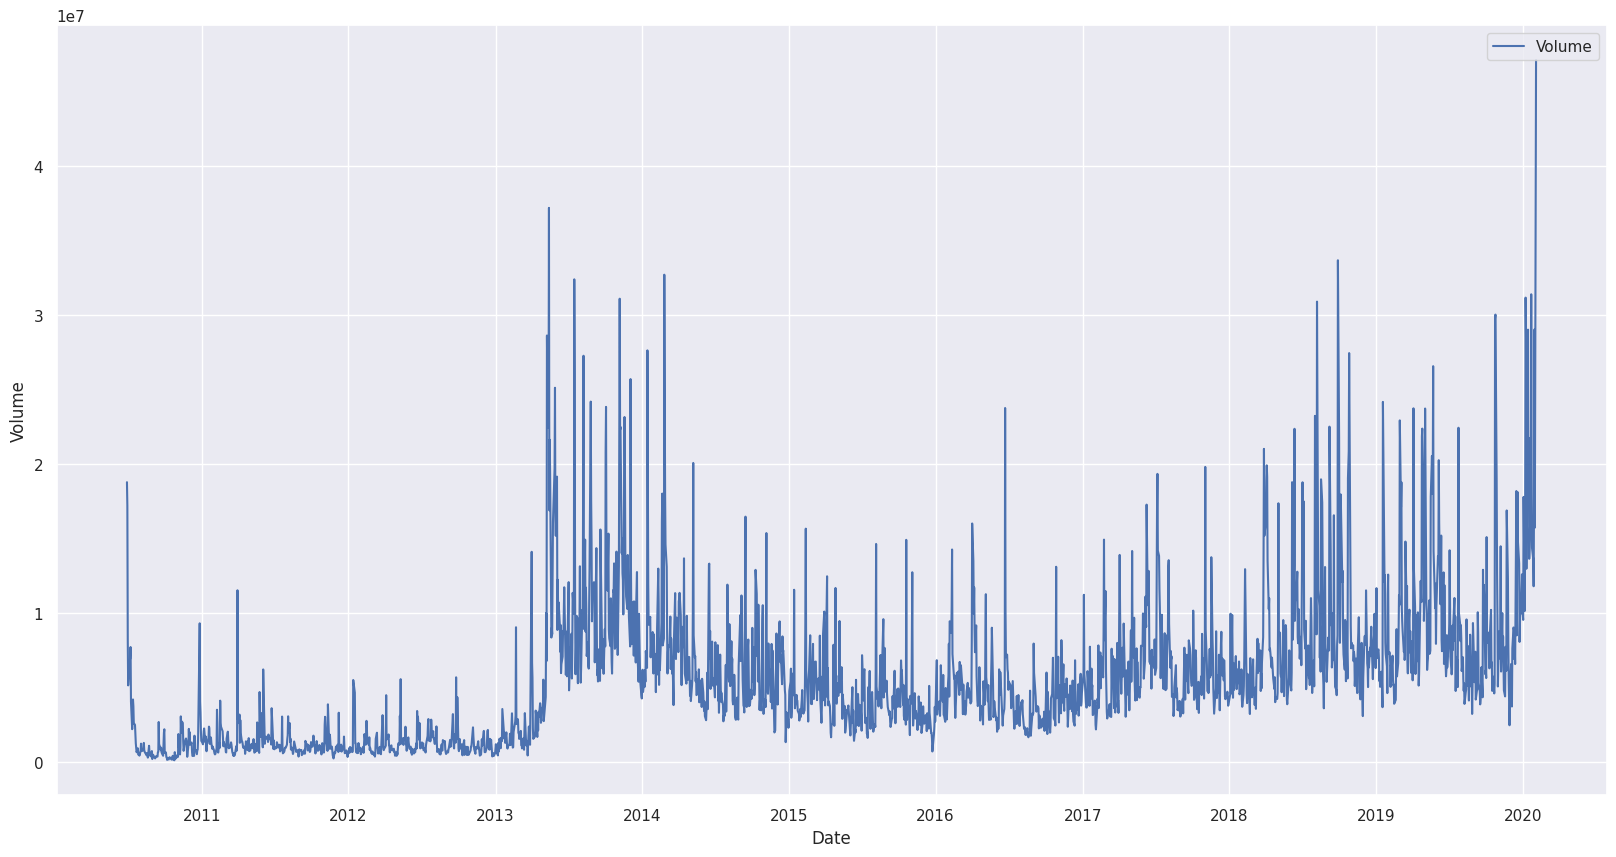

In [11]:
sns.lineplot(x=df.index,y=df['Volume'],label='Volume')

<Axes: xlabel='Date', ylabel='Volume'>

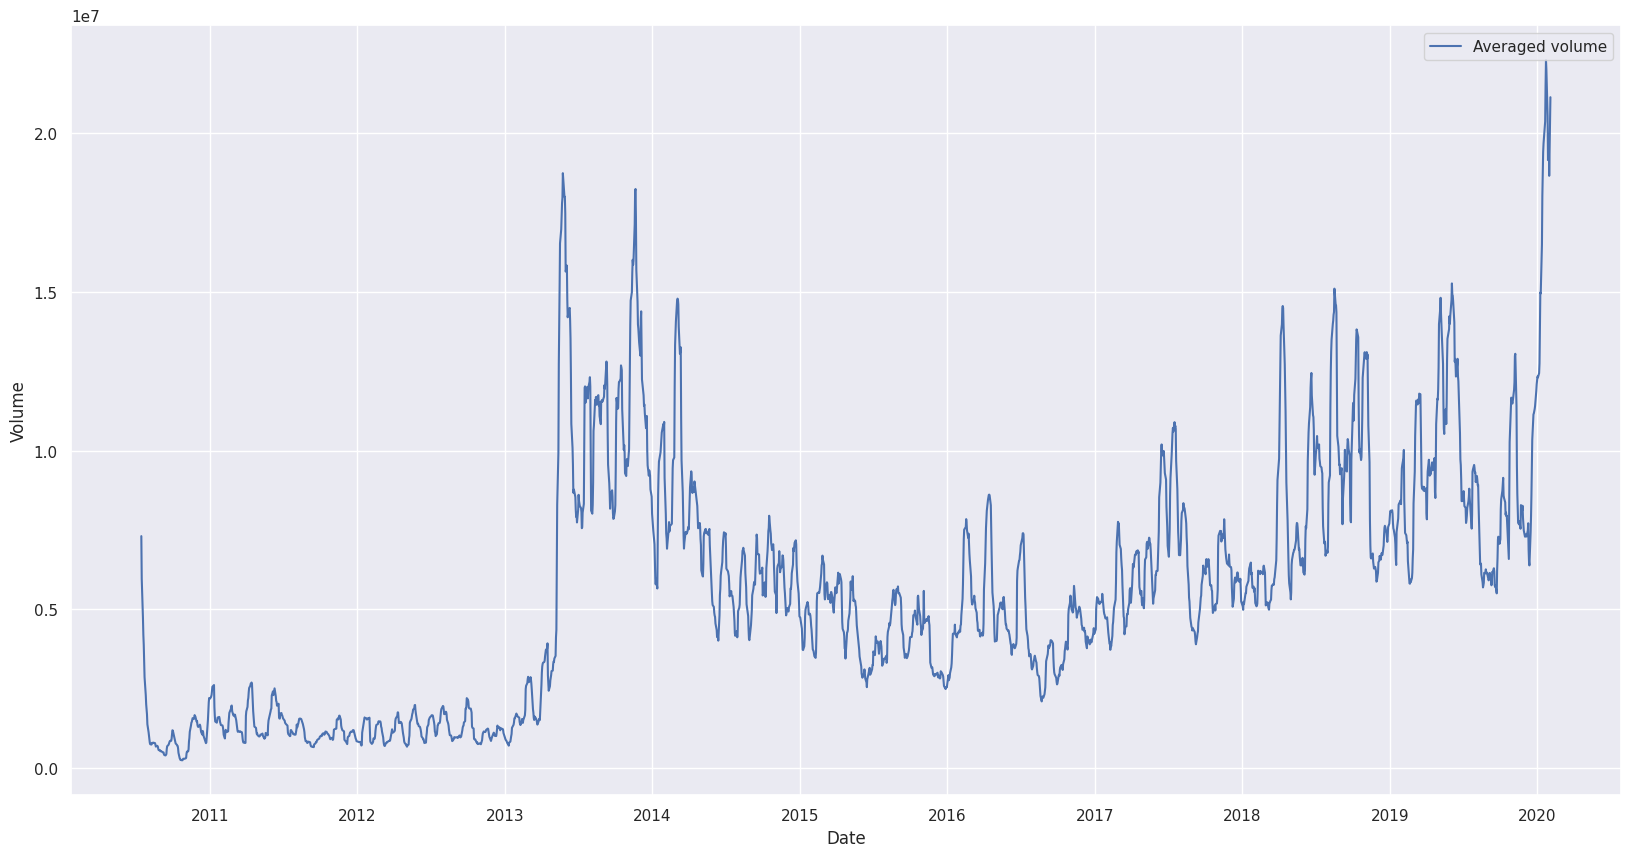

In [12]:
sns.lineplot(x=df.index,y=df['Volume'].rolling(window=12).mean(),label='Averaged volume')

Text(0.5, 1.0, 'Stock Volume/Time')

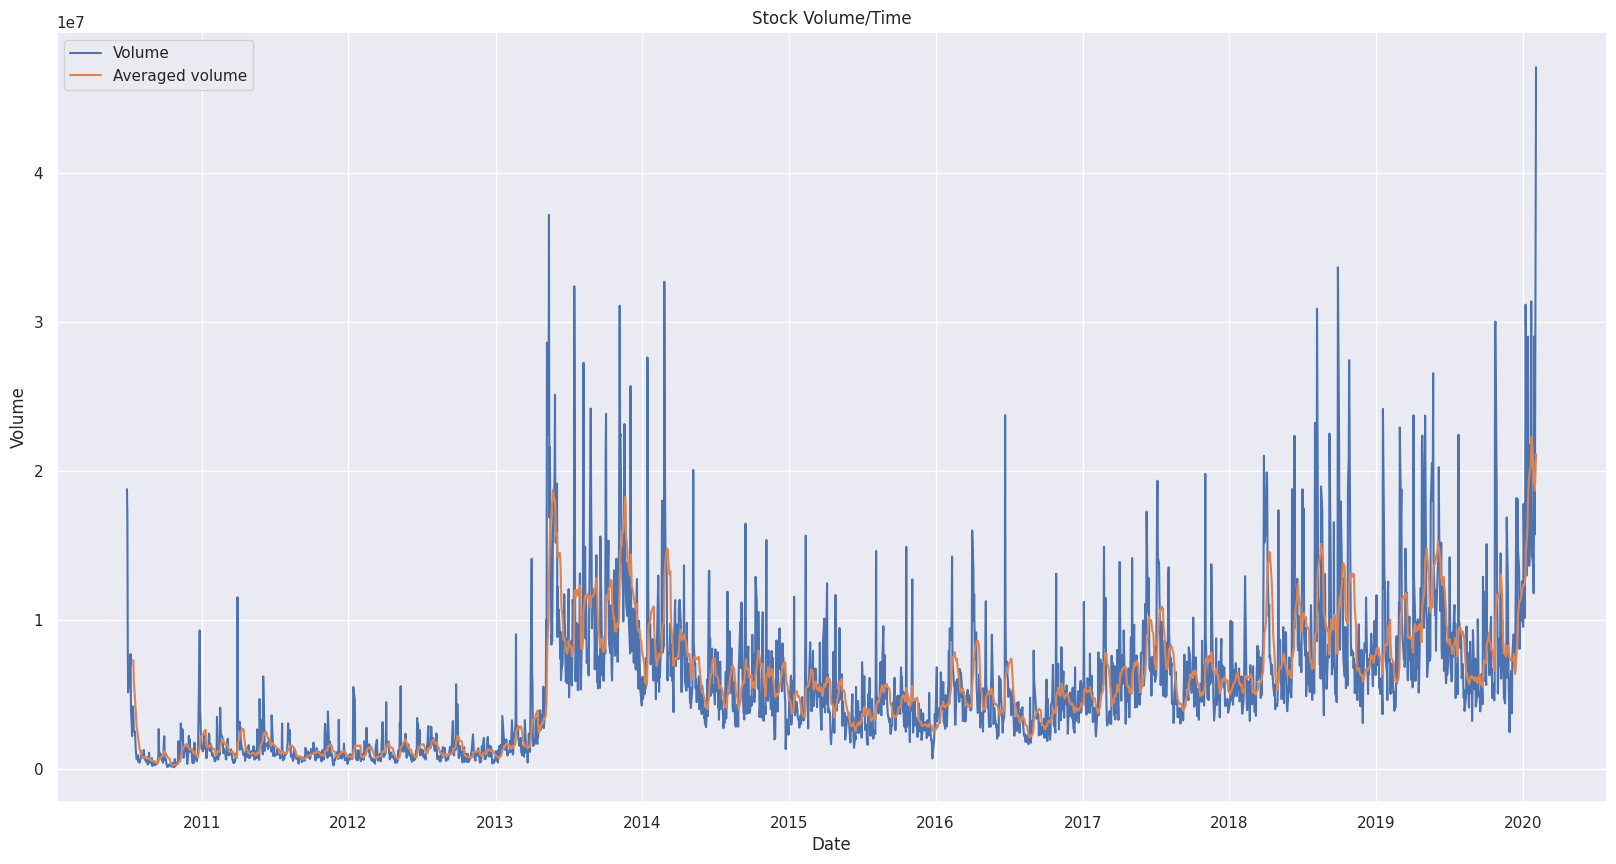

In [13]:
sns.set(rc={'figure.figsize':(20,10)})
sns.lineplot(x=df.index,y=df['Volume'],label='Volume')
sns.lineplot(x=df.index,y=df['Volume'].rolling(window=12).mean(),label='Averaged volume')
plt.title('Stock Volume/Time')

<Axes: title={'center': 'TESLA Stock Price through Time'}, xlabel='Date'>

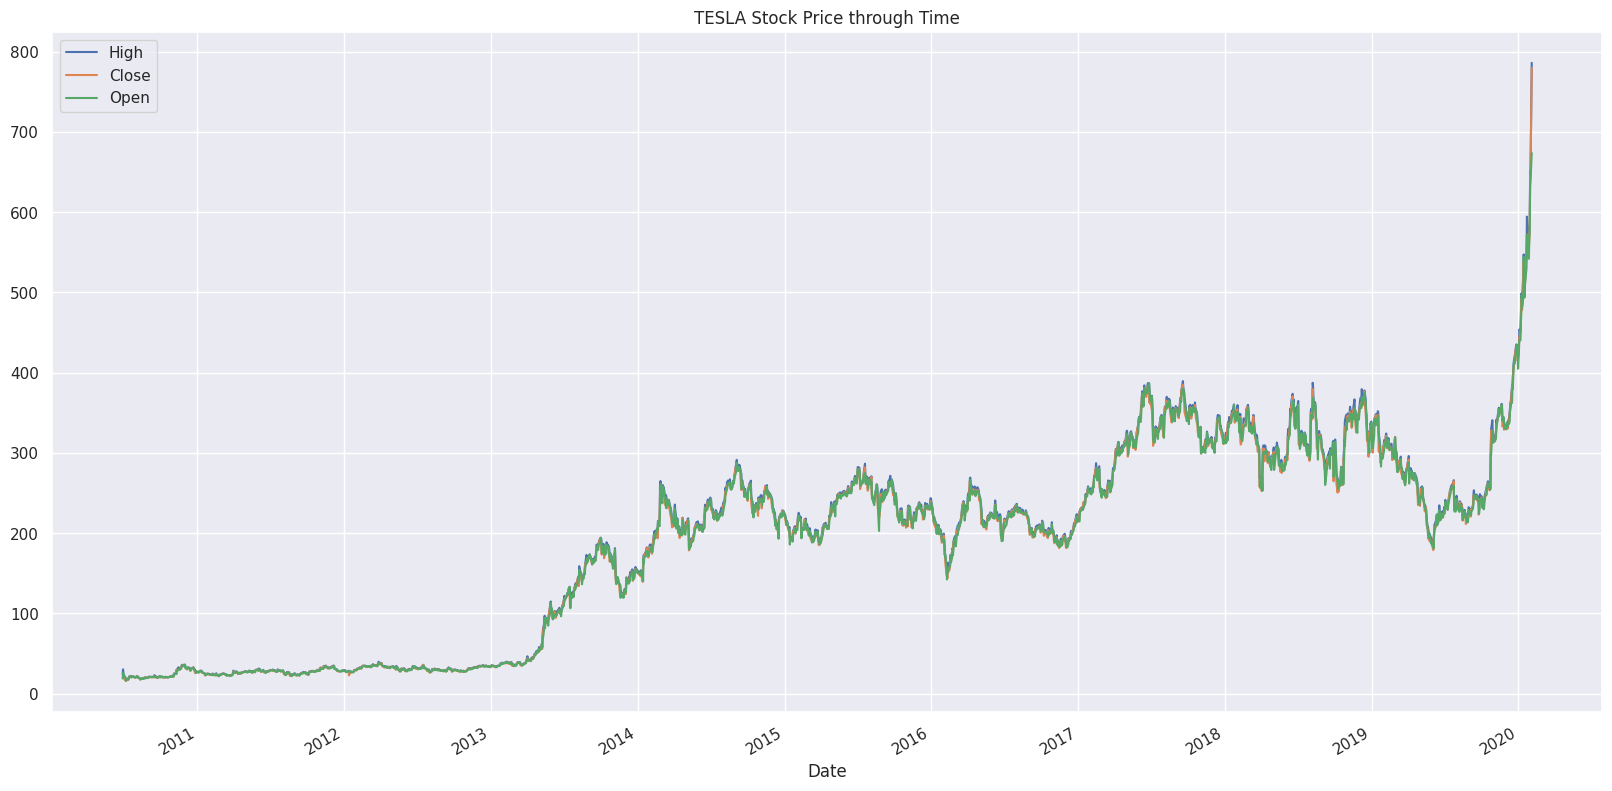

In [14]:
df.plot(y=['High','Close','Open'],title='TESLA Stock Price through Time')

<Axes: xlabel='Year'>

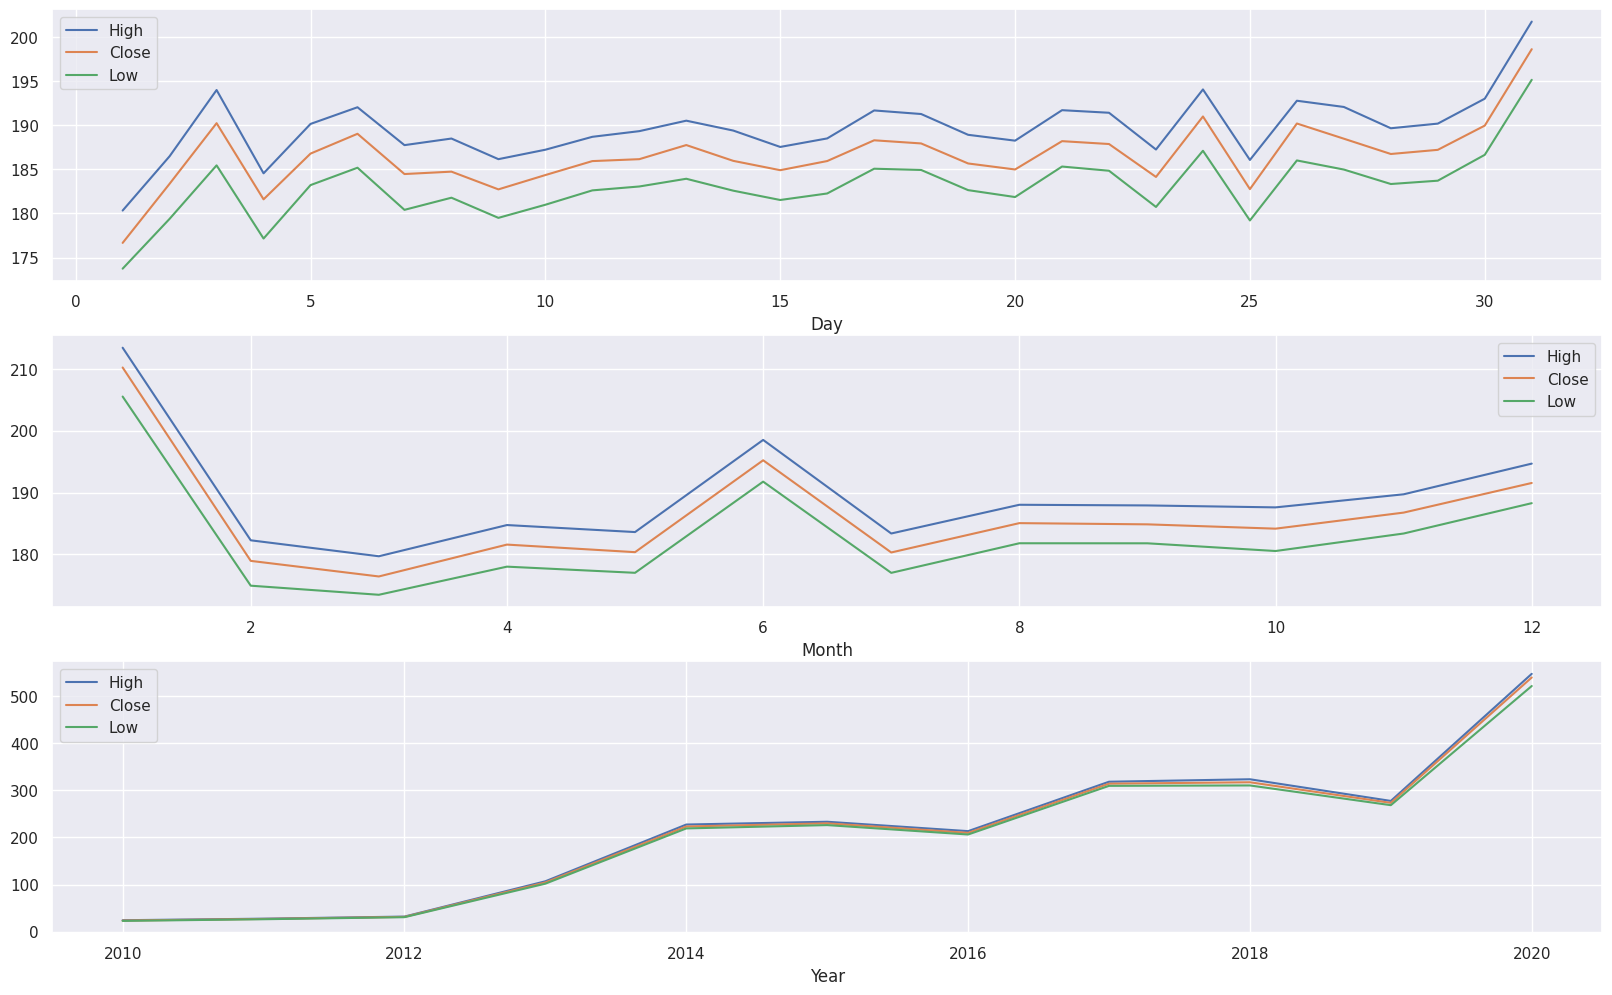

In [15]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(20, 12))

df.groupby(df.index.day).mean().plot(y=['High', 'Close', 'Low'], ax=ax1, xlabel='Day')
df.groupby(df.index.month).mean().plot(y=['High', 'Close', 'Low'], ax=ax2, xlabel='Month')
df.groupby(df.index.year).mean().plot(y=['High', 'Close', 'Low'], ax=ax3, xlabel='Year')

<Axes: xlabel='Year'>

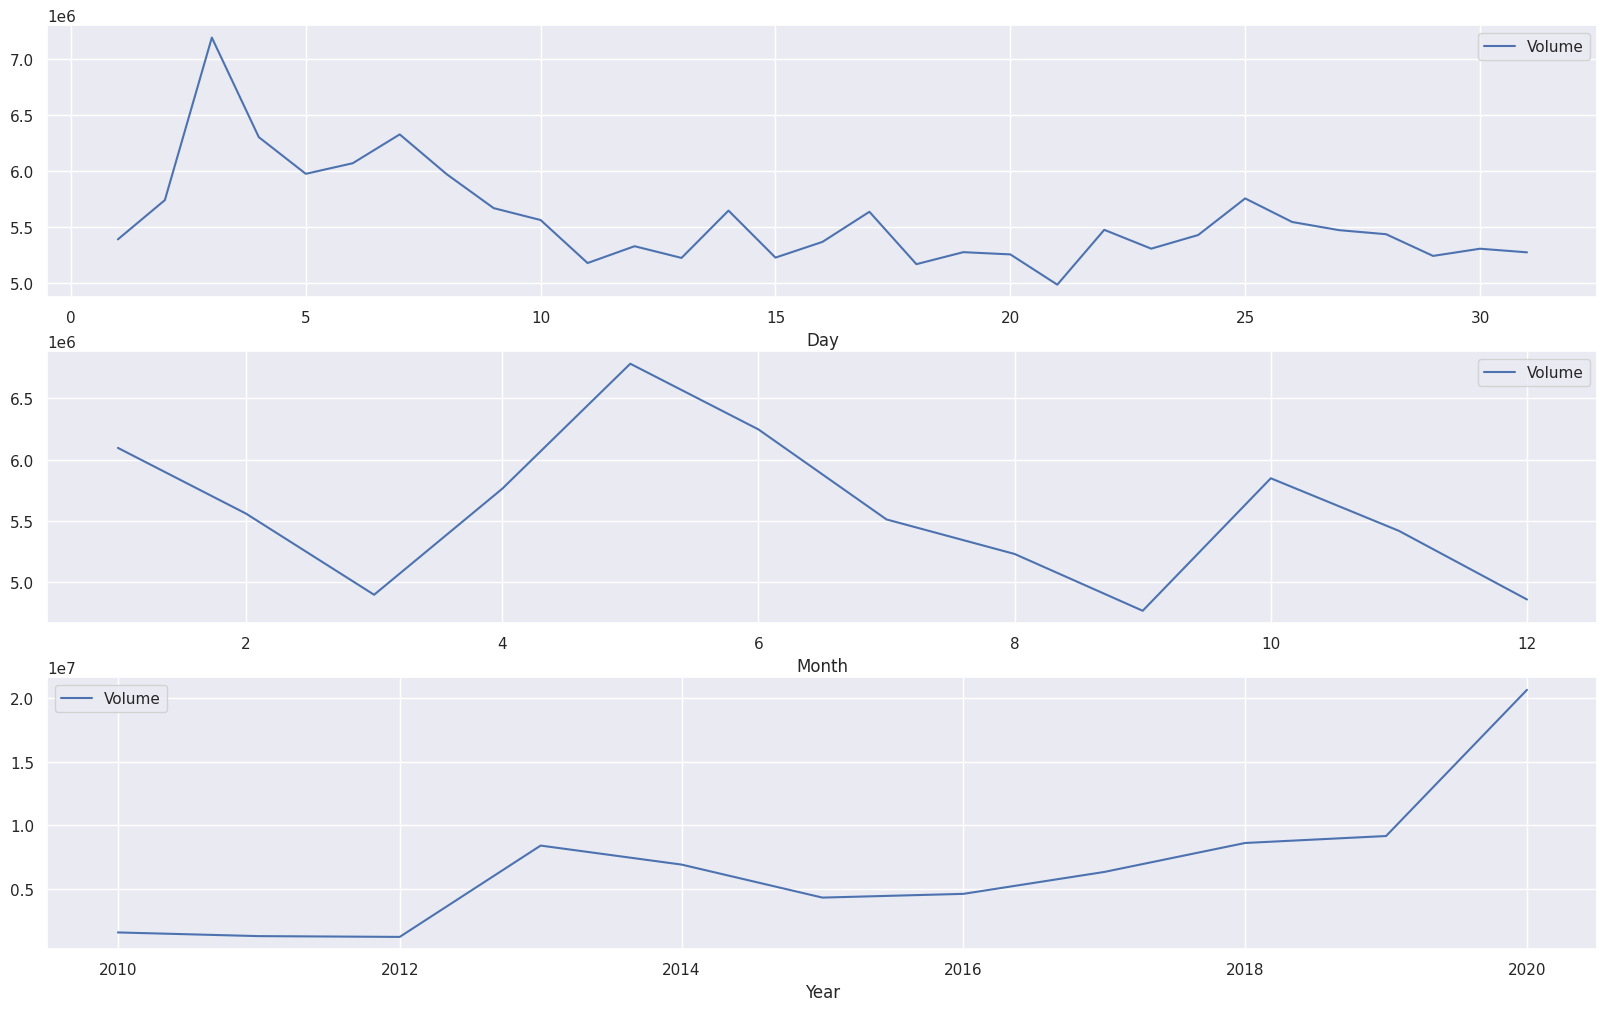

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(20, 12))

df.groupby(df.index.day).mean().plot(y='Volume', ax=ax1, xlabel='Day')
df.groupby(df.index.month).mean().plot(y='Volume', ax=ax2, xlabel='Month')
df.groupby(df.index.year).mean().plot(y='Volume', ax=ax3, xlabel='Year')

Text(0.5, 1.0, 'Volume Autocorrelation')

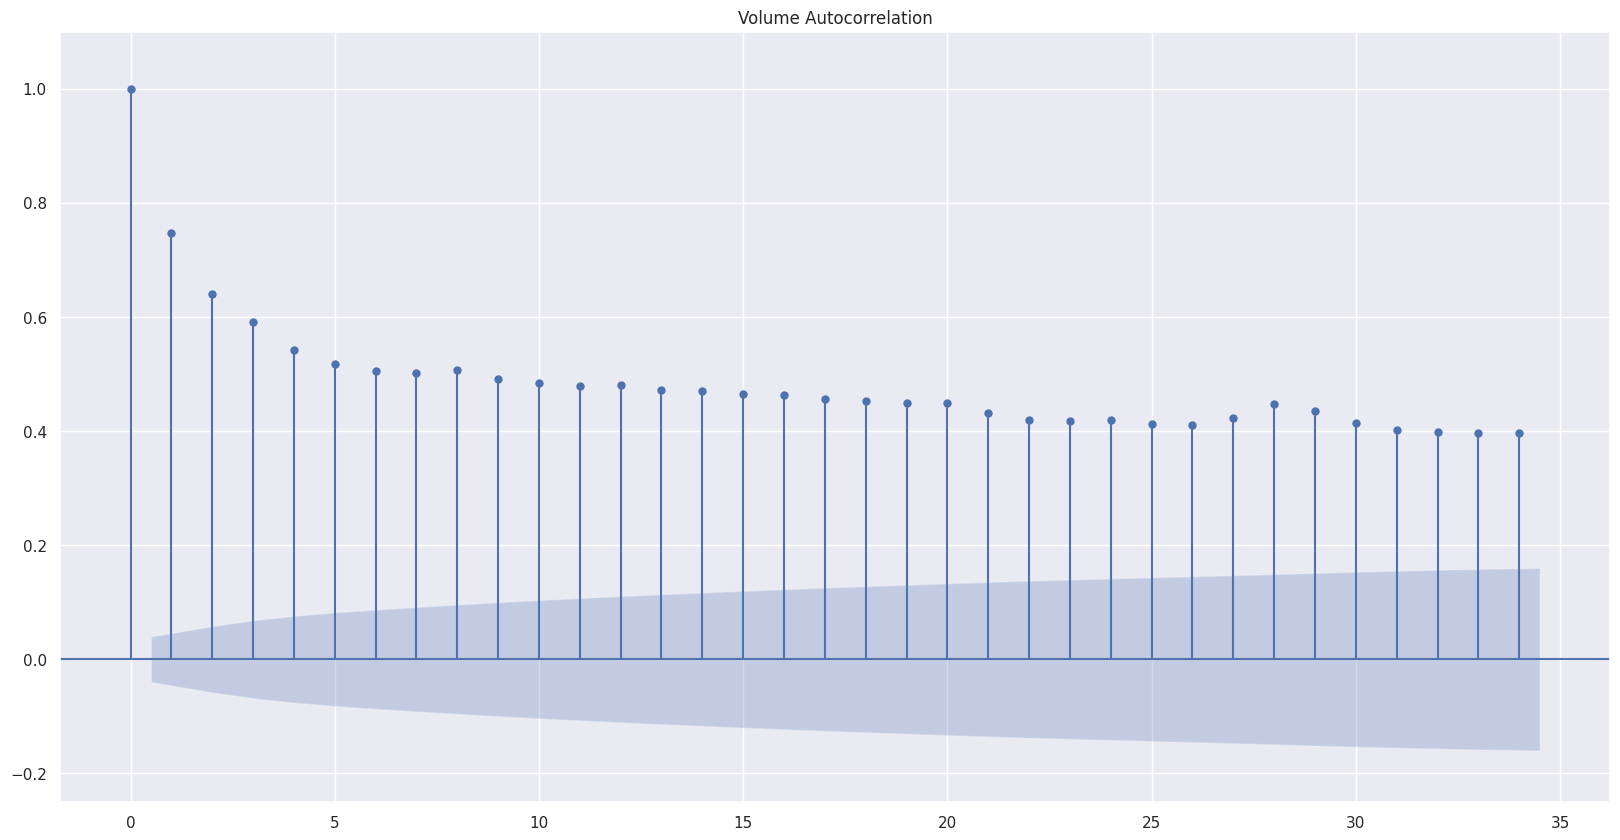

In [17]:
plot_acf(df['Volume'])
plt.ylim([-0.25, 1.1])
plt.title('Volume Autocorrelation')

Text(0.5, 1.0, 'Close Autocorrelation')

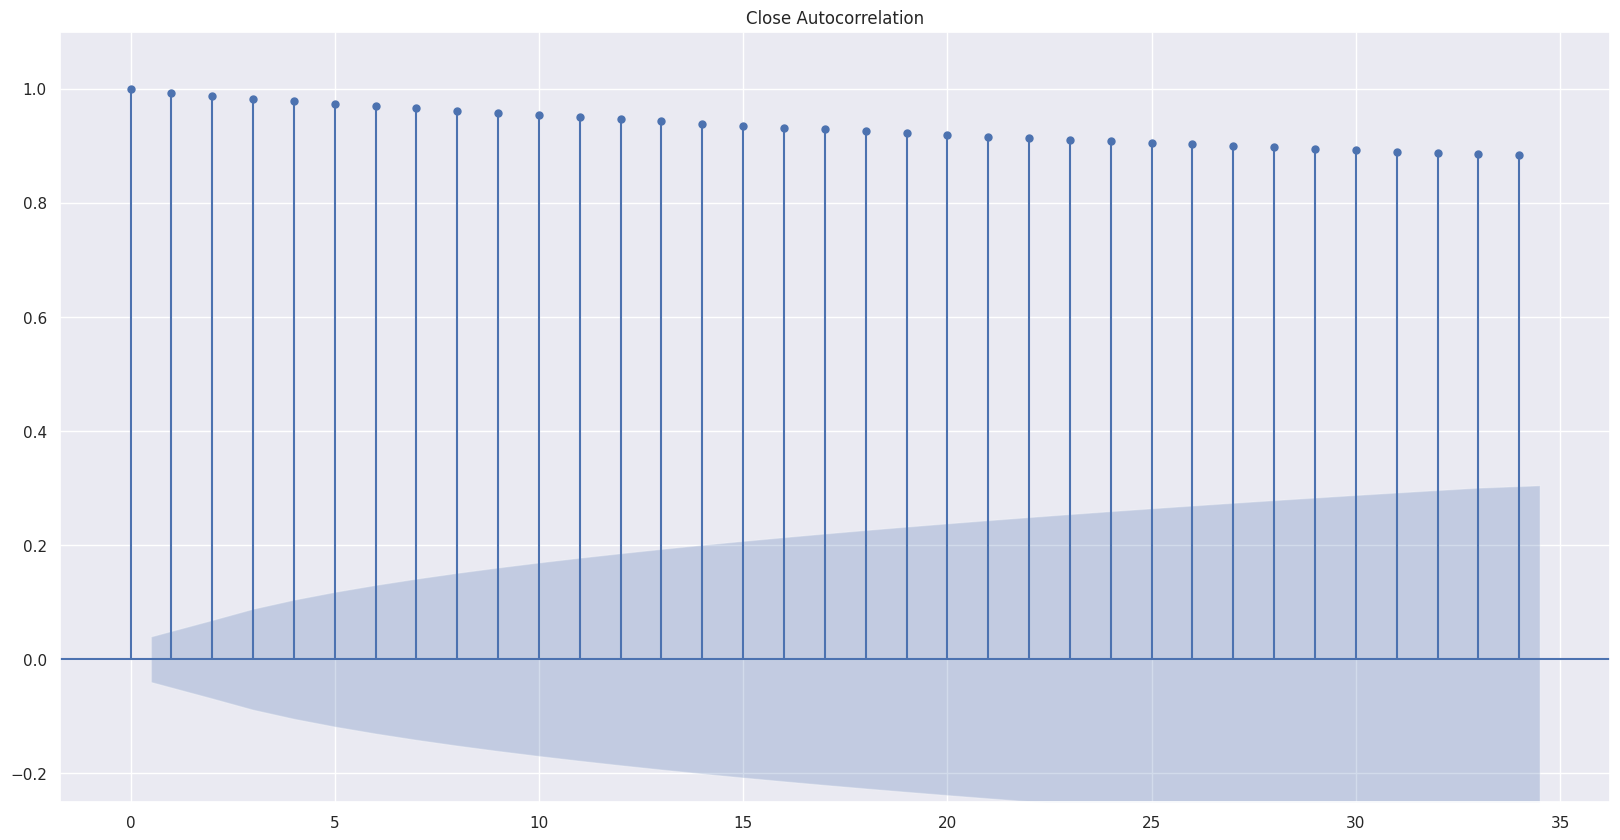

In [18]:
plot_acf(df['Close'])
plt.ylim([-0.25, 1.1])
plt.title('Close Autocorrelation')

In [19]:
df.isna().any()

Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2416 entries, 2010-06-29 to 2020-02-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2416 non-null   float64
 1   High       2416 non-null   float64
 2   Low        2416 non-null   float64
 3   Close      2416 non-null   float64
 4   Adj Close  2416 non-null   float64
 5   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 132.1 KB


In [21]:
df.shape

(2416, 6)

In [22]:
df.duplicated().sum()

0

In [23]:

df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [24]:
adf_df = pd.DataFrame(data=adfuller(df['Close']),
                      columns=['Values'],
                      index=['Test statistic',
                             'P-value',
                             'Number of lags',
                             'Number of observation',
                             'Critical values',
                             'Information criteria']
                      )
adf_df


,Values
Test statistic,1.400069
P-value,0.997114
Number of lags,18
Number of observation,2397
Critical values,"{'1%': -3.4330810457844425, '5%': -2.862746538..."
Information criteria,16128.395638


In [25]:
diff1 = df['Close'].diff(1)[1:]
p_value = adfuller(diff1)
p_value

(-6.151177133855798,
 7.55585798788595e-08,
 17,
 2397,
 {'1%': -3.4330810457844425,
  '5%': -2.862746538733181,
  '10%': -2.567412291147901},
 16122.604051980812)

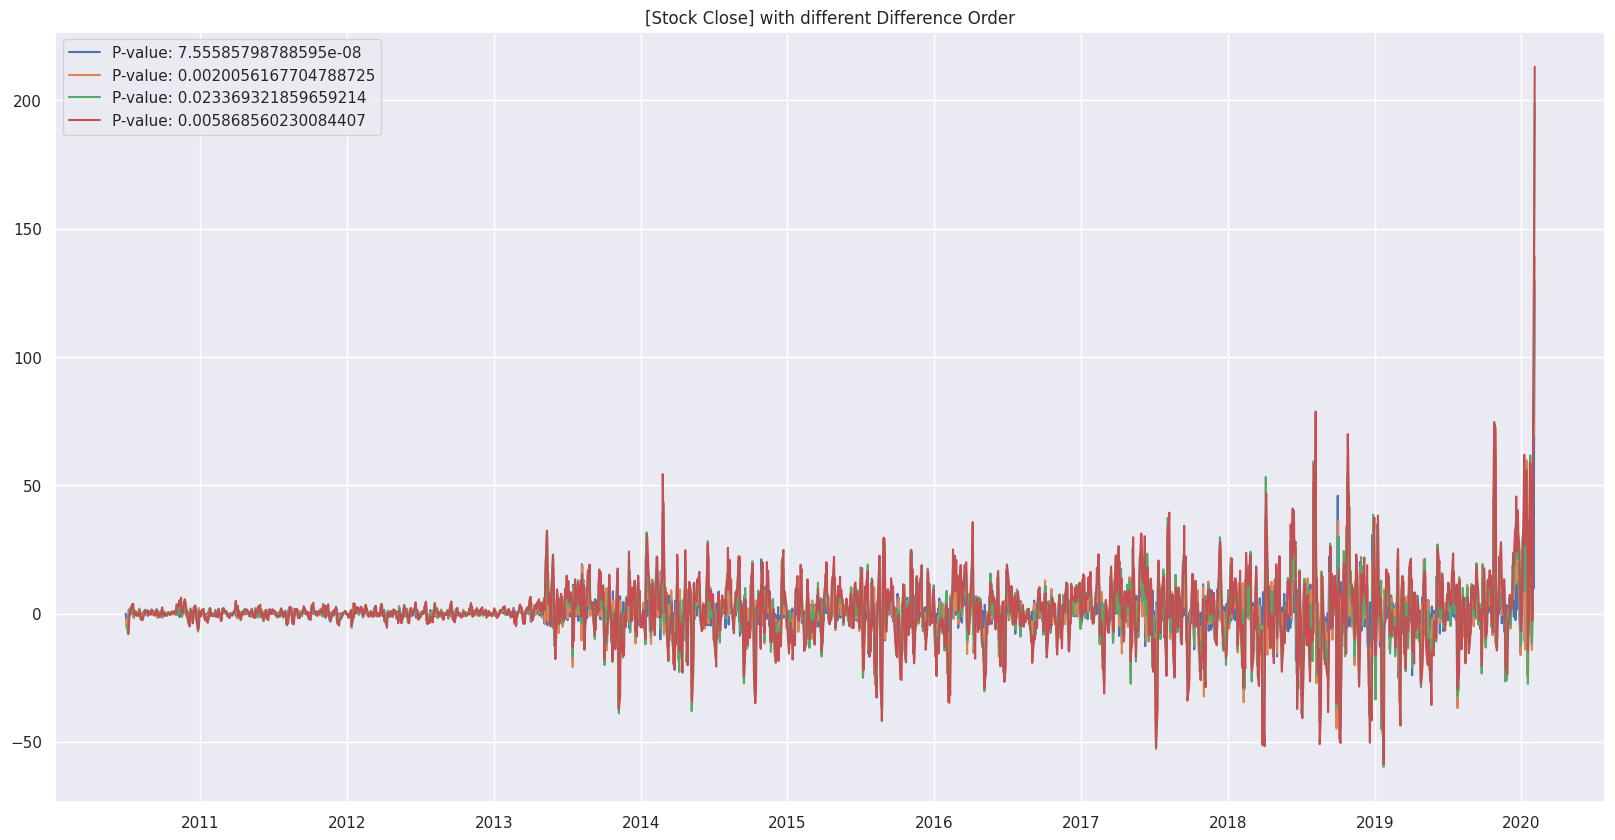

In [26]:
plt.title('[Stock Close] with different Difference Order')

for i in range(1, 5):
    p_value = adfuller(df['Close'].diff(i)[i:])[1]
    plt.plot(df['Close'].diff(i).dropna(), label=f'P-value: {p_value}')

plt.legend();


<Axes: xlabel='Date'>

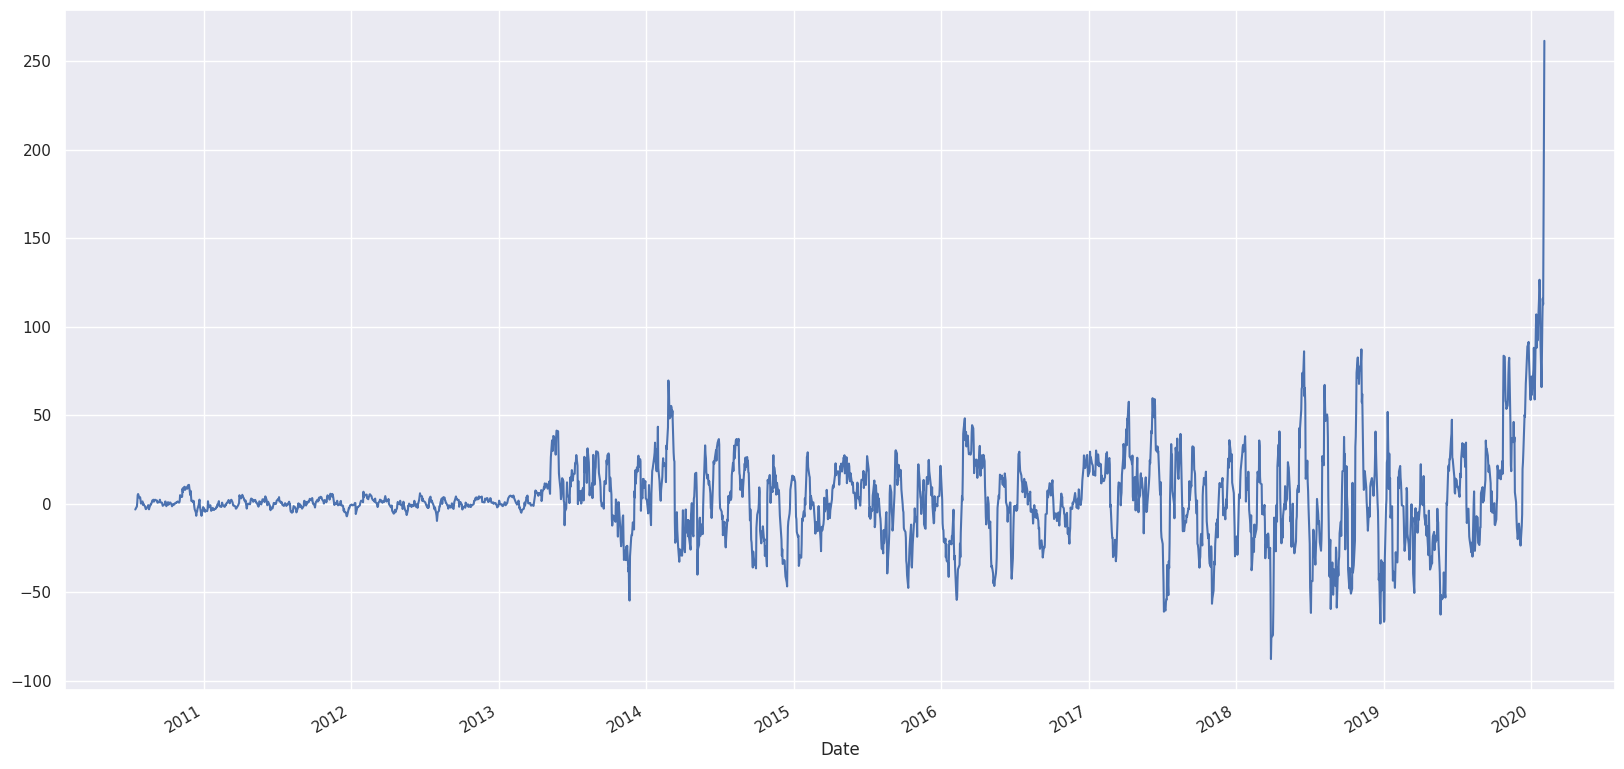

In [27]:
seas_diff = df['Close'] - df['Close'].shift(12)
seas_diff.plot()

In [28]:
adfuller(seas_diff.dropna())

(-1.7293302916482376,
 0.41606748758143264,
 27,
 2376,
 {'1%': -3.433105209968547,
  '5%': -2.8627572092083597,
  '10%': -2.5674179723228354},
 16689.33026780321)

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


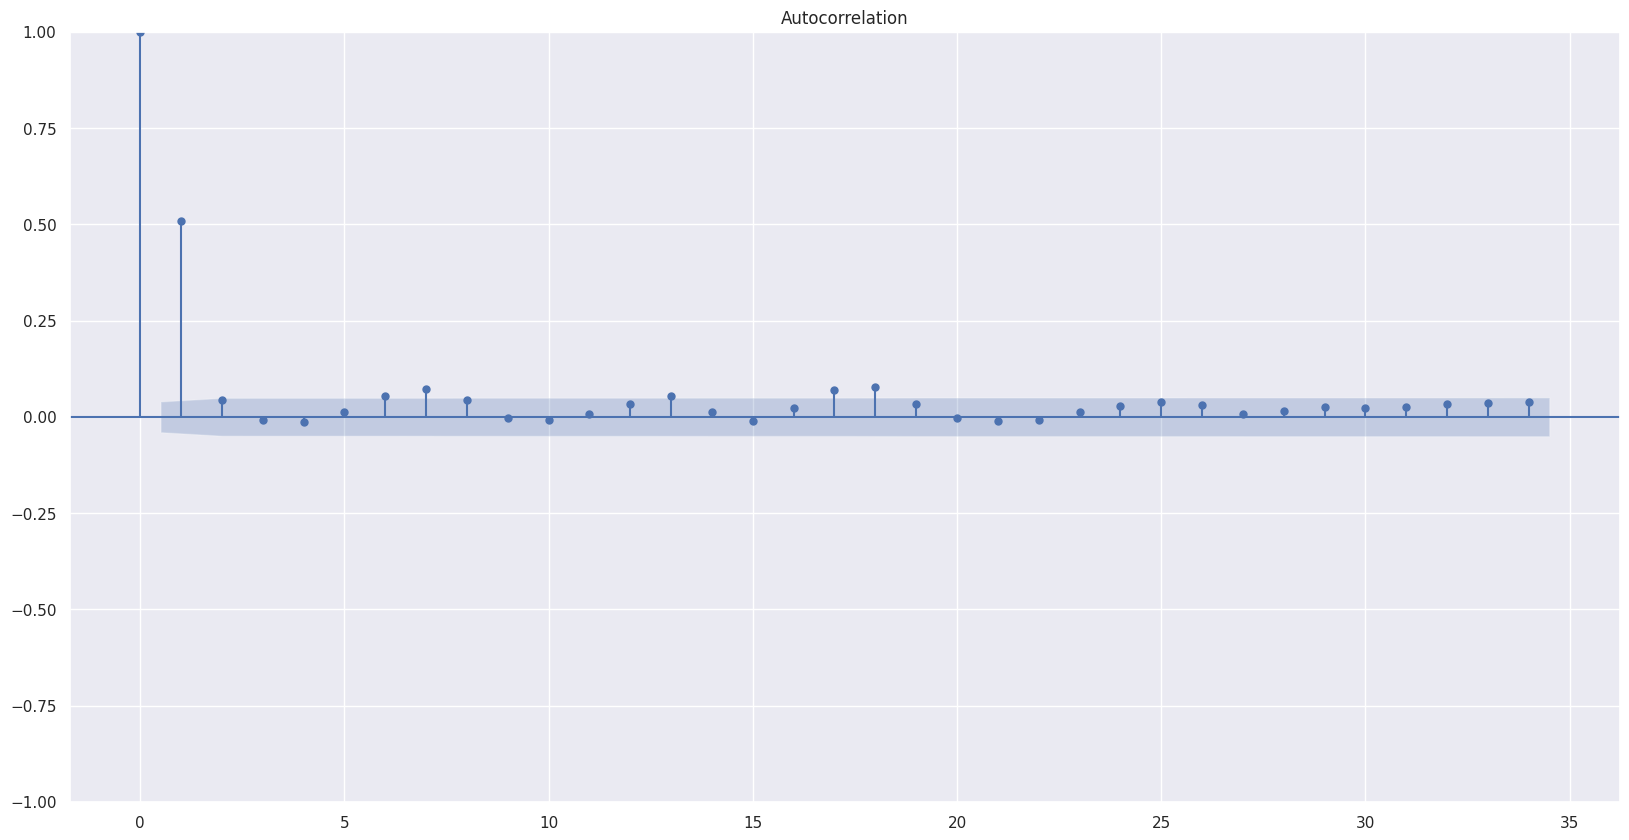

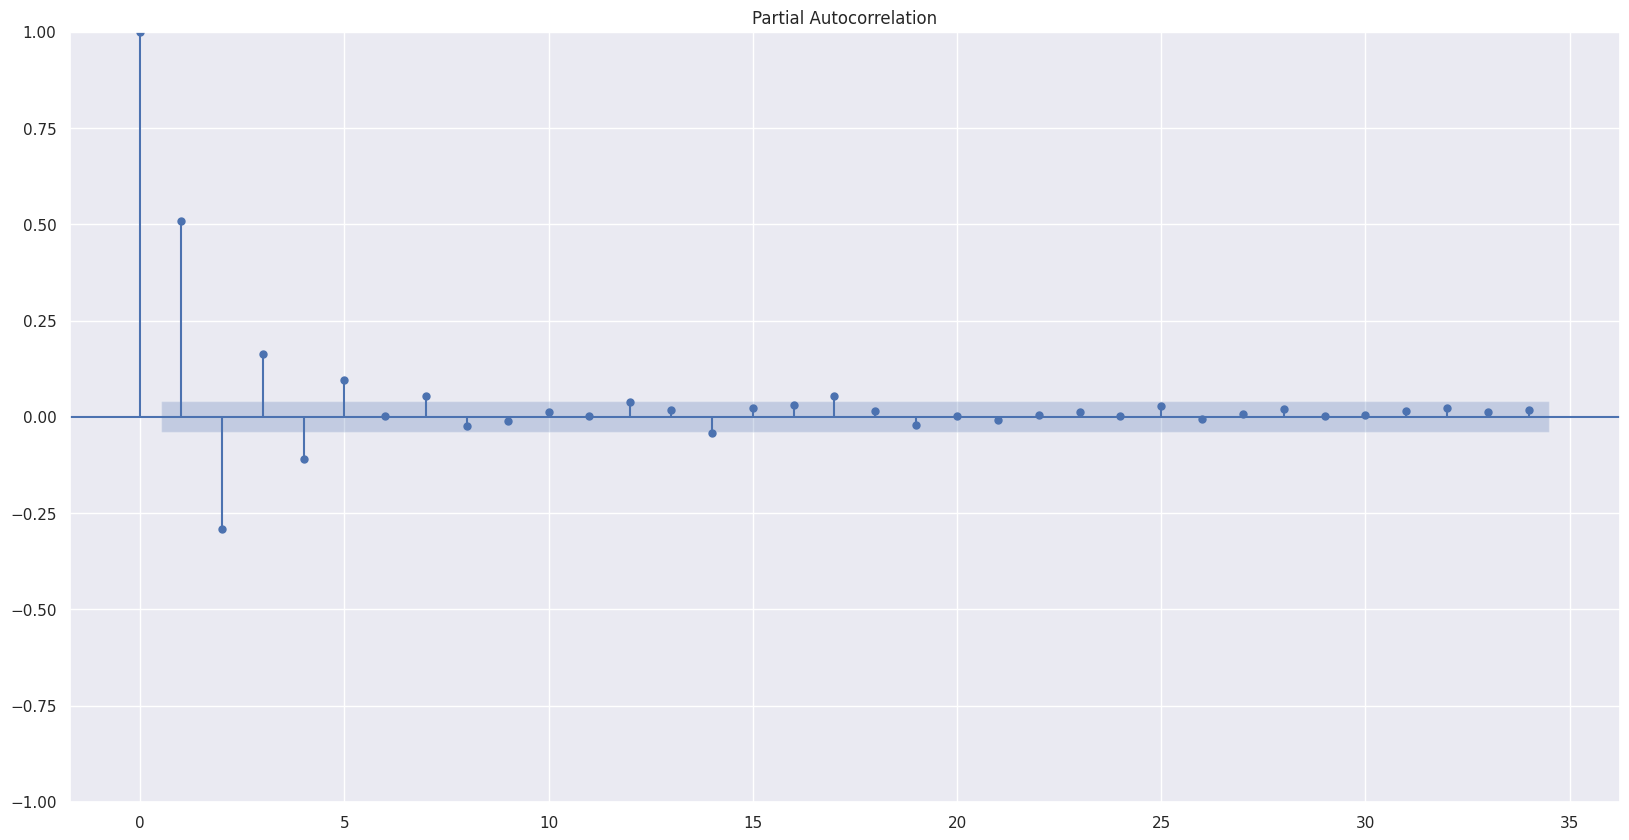

In [29]:
plot_acf(df['Close'].diff(2).dropna())
plot_pacf(df['Close'].diff(2).dropna());

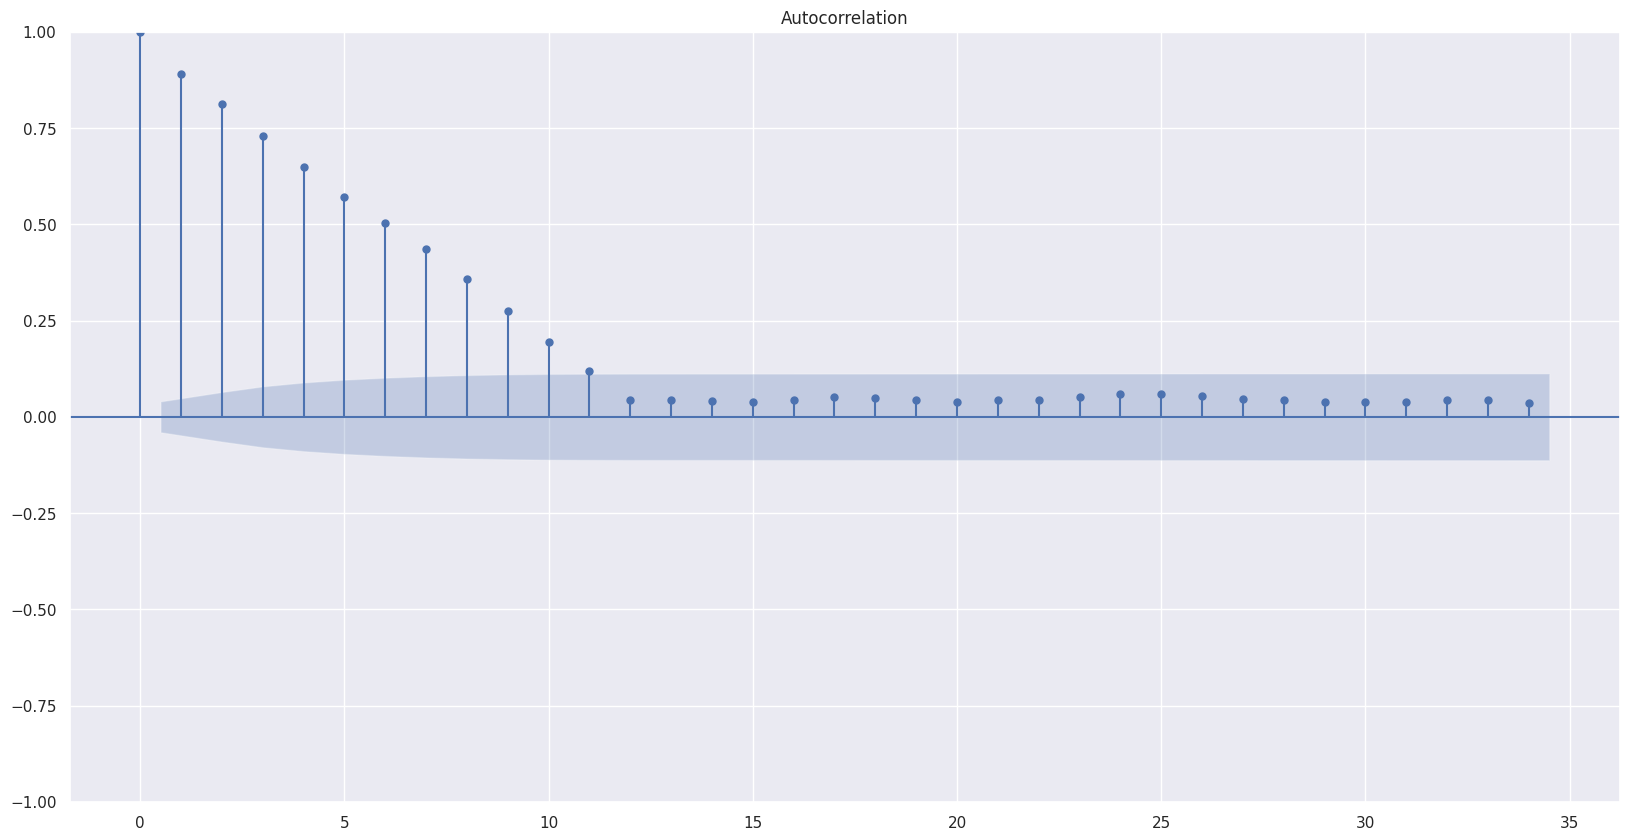

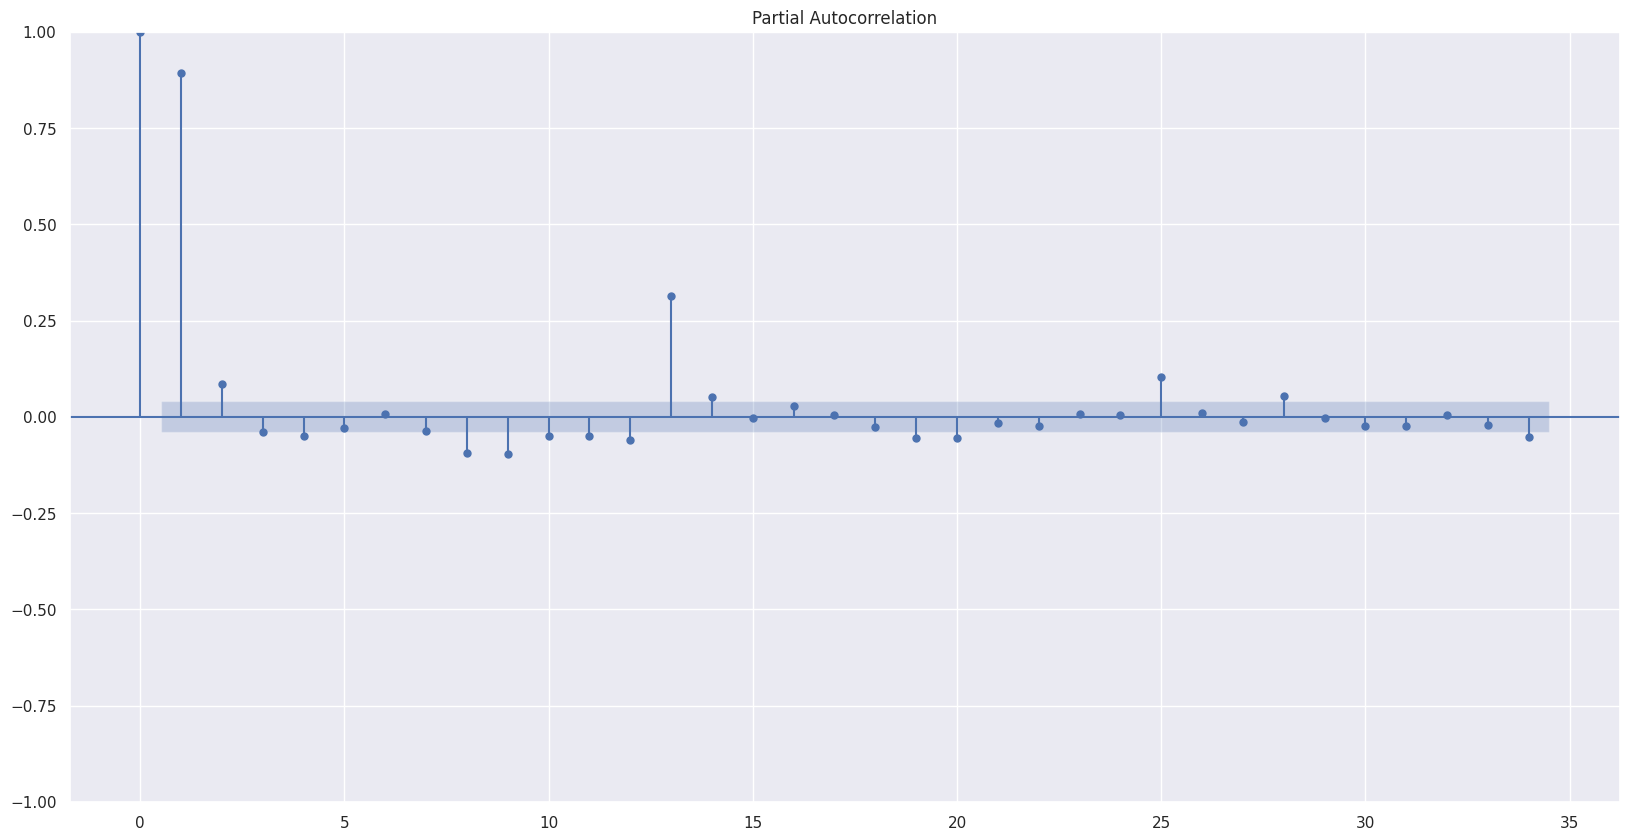

In [30]:
plot_acf(seas_diff.dropna())
plot_pacf(seas_diff.dropna());

In [31]:
stationary_ts = df['Close'].diff(2).dropna()
stationary_ts = stationary_ts.resample('M').mean()
train_len = int(0.7*len(stationary_ts))

In [32]:
model = SARIMAX(stationary_ts.iloc[:train_len],
                order=(1, 2, 1),
                seasonal_order=(1, 0, 0, 12))

result = model.fit()

<Axes: ylabel='Density'>

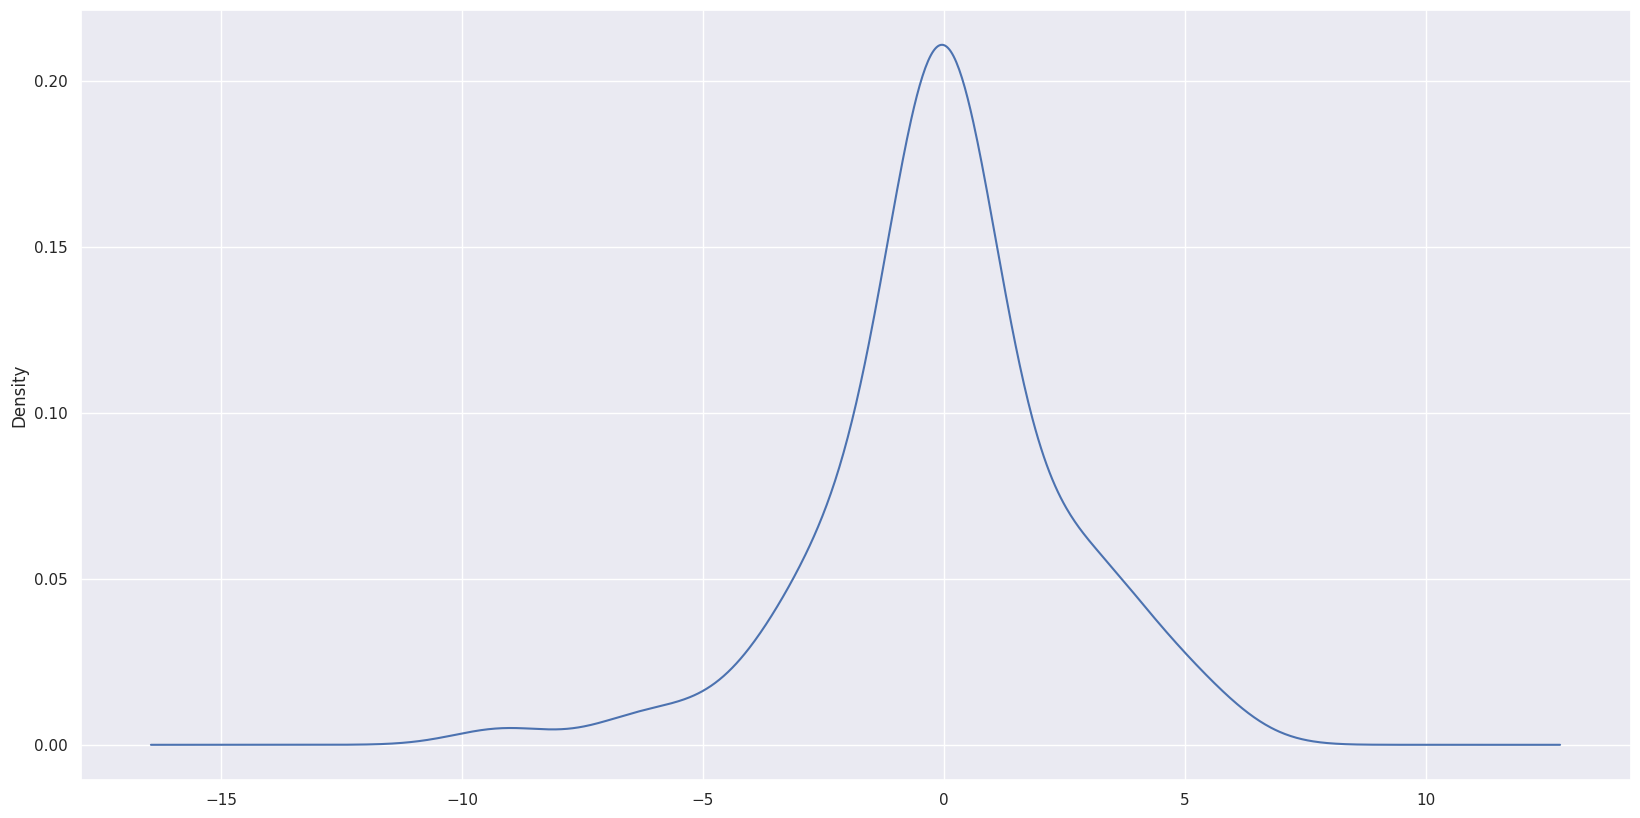

In [33]:
result.resid.plot(kind='kde')

<Axes: title={'center': 'Predicting -> TESLA Stock Price'}, xlabel='Date'>

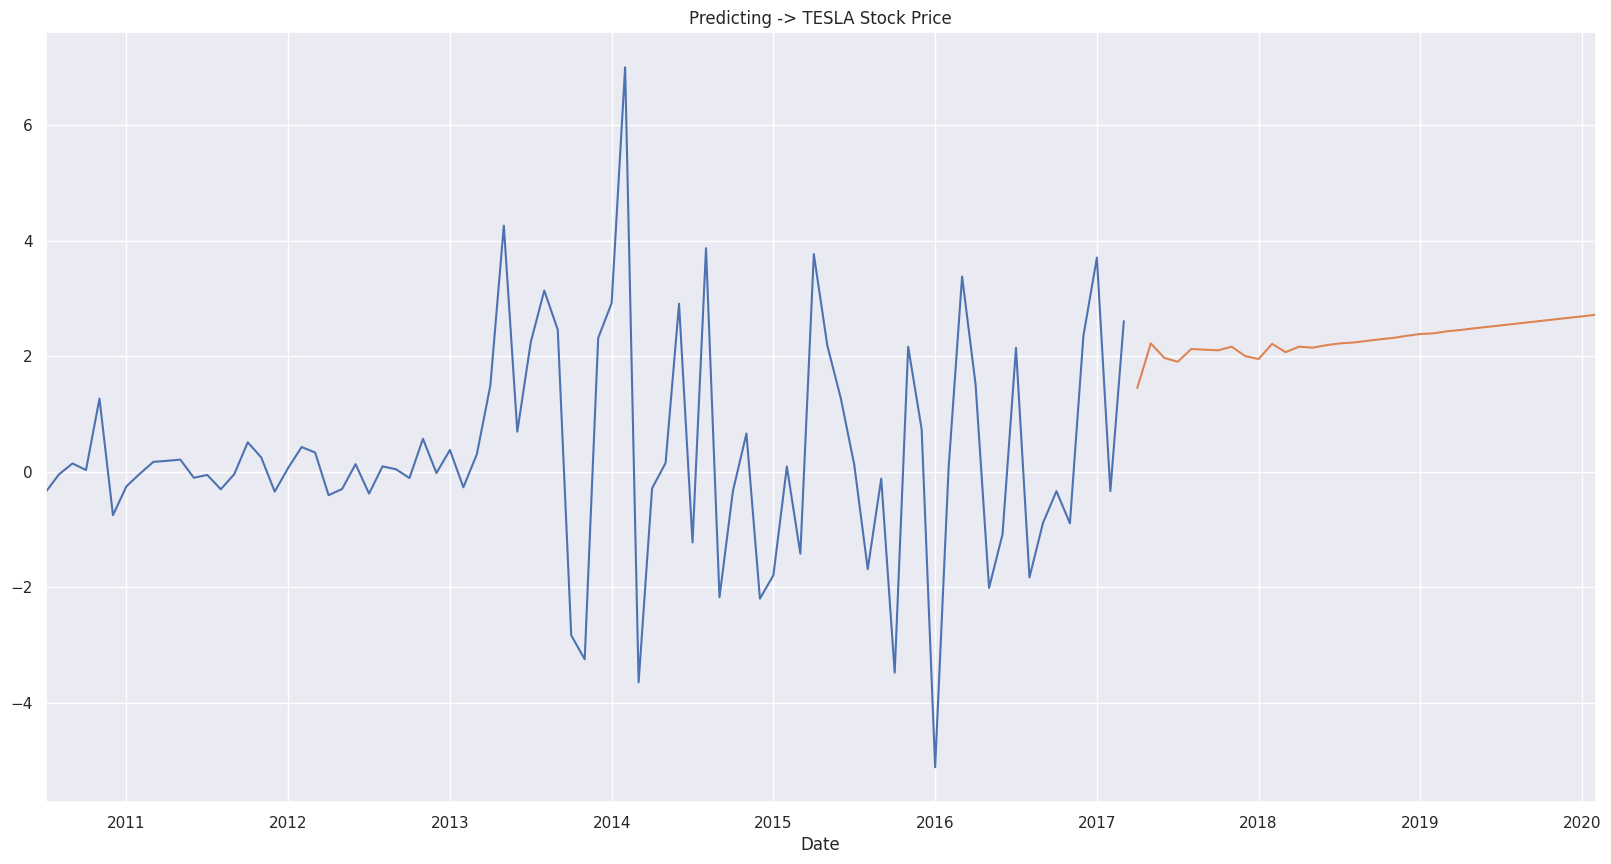

In [34]:
start, end = stationary_ts.index.values[train_len], stationary_ts.index.values[-1]
predictions = result.predict(start=start, end=end)

plt.title('Predicting -> TESLA Stock Price')
stationary_ts.iloc[:train_len].plot()

predictions.dropna().plot()